In [1]:
# Dataset : https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

In [2]:
import sys
sys.path.append("/home/ali/Desktop/python/Machine Learning/Dataset_custom")

In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, minmax_scale
from sklearn.pipeline import Pipeline
from load_data import LoadModel
import pandas as pd
import seaborn as sns

In [4]:
df = LoadModel().load_cardio()

In [5]:
x = df.drop(["id", "cardio"], axis=1)
y = df["cardio"]

In [6]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [7]:
correlation = x.corr()

In [8]:
correlation

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476


<Axes: >

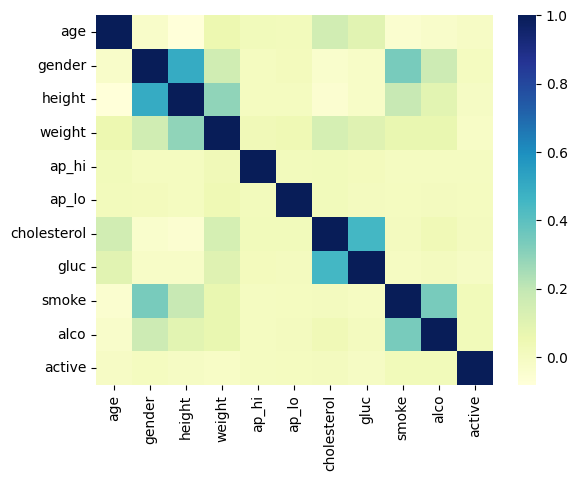

In [9]:
sns.heatmap(correlation, cmap='YlGnBu', vmax=1)

In [10]:
# sns.pairplot(df)

In [11]:
print(f"linear form shape: {x.shape}")

linear form shape: (70000, 11)


In [12]:
x = PolynomialFeatures().fit_transform(x)
x= StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
print(f"Polynomial form shape: {x_train.shape}")

Polynomial form shape: (56000, 78)


In [14]:
model = SVC()

In [15]:
model.fit(x, y)

SVC()

In [16]:
train_accuracy, test_accuracy = model.score(x_test, y_test), model.score(x_train, y_train)
print(f"train_accuracy: {train_accuracy}\ntest_Accuracy: {test_accuracy}")

train_accuracy: 0.7364285714285714
test_Accuracy: 0.7333928571428572
